In [1]:
from pathlib import Path

import fire
import matplotlib.pyplot as plt
from datasets import load_dataset
from tqdm import tqdm

from mattext.models.utils import TokenizerMixin


In [4]:
from xtal2txt.tokenizer import (
    CifTokenizer,
    SliceTokenizer,
)

In [5]:
_DEFAULT_SPECIAL_TOKENS = {
    "unk_token": "[UNK]",
    "pad_token": "[PAD]",
    "cls_token": "[CLS]",
    "sep_token": "[SEP]",
    "mask_token": "[MASK]",
    "eos_token": "[EOS]",
    "bos_token": "[BOS]",
}

_wrapped_tokenizer = SliceTokenizer(
                    model_max_length=512, truncation=False, padding=False
                )

_wrapped_tokenizer.add_special_tokens(special_tokens=_DEFAULT_SPECIAL_TOKENS)



def _tokenize_pad_and_truncate(texts, representation, context_length: int):
        """Tokenizes, pads, and truncates input texts."""
        return _wrapped_tokenizer(texts[str(representation)], truncation=True, padding="max_length", max_length=context_length)


In [8]:
from functools import partial
path= "/work/so87pot/material_db/all_1/test_matbench_dielectric_0.json"
ds = load_dataset("json", data_files=path,split="train")
dataset = ds.train_test_split(shuffle=True, test_size=0.2, seed=42)
#dataset= dataset.filter(lambda example: example[self.representation] is not None)
data  =  dataset.map(
    partial(_tokenize_pad_and_truncate, representation = "slice" ,context_length=512),
    batched=True)

Map:   0%|          | 0/567 [00:00<?, ? examples/s]

Map:   0%|          | 0/142 [00:00<?, ? examples/s]

In [18]:
tokens = data['train']['input_ids'][0]

In [17]:
len(data['train']['input_ids'][0])

512

In [19]:
tokens

[149,
 64,
 64,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 139,
 140,
 142,
 6,
 139,
 140,
 142,
 0,
 139,
 143,
 6,
 139,
 143,
 15,
 139,
 140,
 139,
 18,
 139,
 140,
 139,
 0,
 139,
 140,
 141,
 6,
 139,
 140,
 141,
 0,
 139,
 146,
 6,
 139,
 146,
 15,
 139,
 140,
 148,
 18,
 139,
 140,
 148,
 0,
 139,
 140,
 146,
 0,
 139,
 142,
 0,
 139,
 140,
 143,
 0,
 139,
 147,
 0,
 139,
 141,
 139,
 18,
 139,
 141,
 139,
 6,
 139,
 141,
 139,
 0,
 139,
 140,
 145,
 0,
 139,
 140,
 144,
 0,
 140,
 148,
 2,
 140,
 140,
 144,
 20,
 140,
 140,
 140,
 20,
 140,
 140,
 140,
 23,
 140,
 141,
 0,
 140,
 141,
 141,
 18,
 140,
 141,
 141,
 21,
 140,
 140,
 145,
 18,
 140,
 141,
 140,
 18,
 140,
 141,
 140,
 0,
 140,
 141,
 140,
 3,
 140,
 145,
 23,
 140,
 145,
 5,
 140,
 140,
 147,
 20,
 140,
 140,
 147,
 2,
 140,
 144,
 21,
 140,
 144,
 3,
 140,
 141,
 142,
 18,
 140,
 141,
 142,
 0,
 140,
 140,
 143,
 2,
 140,
 140,
 146,
 0,
 141,


In [23]:
_wrapped_tokenizer.decode(tokens,skip_special_tokens=False)

'[CLS] Sr Sr B B B B B B B B O O O O O O O O O O O O O O 0 1 3 o - o 0 1 3 o o o 0 4 o - o 0 4 + - o 0 1 0 - o o 0 1 0 o o o 0 1 2 o - o 0 1 2 o o o 0 7 o - o 0 7 + - o 0 1 9 - o o 0 1 9 o o o 0 1 7 o o o 0 3 o o o 0 1 4 o o o 0 8 o o o 0 2 0 - o o 0 2 0 o - o 0 2 0 o o o 0 1 6 o o o 0 1 5 o o o 1 9 o o - 1 1 5 - o - 1 1 1 - o - 1 1 1 - + - 1 2 o o o 1 2 2 - o o 1 2 2 - + o 1 1 6 - o o 1 2 1 - o o 1 2 1 o o o 1 2 1 o + o 1 6 - + - 1 6 o + - 1 1 8 - o - 1 1 8 o o - 1 5 - + o 1 5 o + o 1 2 3 - o o 1 2 3 o o o 1 1 4 o o - 1 1 7 o o o 2 2 2 - o o 2 1 0 - o o 2 1 6 - o o 2 1 7 o o o 3 1 7 o o o 3 2 3 o o o 3 1 3 o o o 3 1 6 o o o 4 1 6 - o o 4 2 0 - o o 4 1 0 - + o 4 1 3 o o o 5 2 3 o - o 5 2 1 o o o 5 1 7 o o o 5 2 2 o o o 6 1 8 o - o 6 1 4 o o o 6 2 1 o o + 6 1 1 o o o 7 2 0 - o o 7 1 5 - o o 7 1 9 - + o 7 1 2 o o o 8 1 4 o o o 8 1 2 o o o 8 1 8 o o o 8 1 5 o o o 9 1 9 - o o 9 1 1 - o o 9 1 5 - o o 9 1 4 o o o [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [

In [2]:

def _prepare_datasets(path: str):
        """
        Prepare training and validation datasets.

        Args:
            train_df (pd.DataFrame): DataFrame containing training data.

        Returns:
            DatasetDict: Dictionary containing training and validation datasets.
        """
        cfg = {"representation" : "slice"}
        DEFAULT_SPECIAL_TOKENS = {
        "unk_token": "[UNK]",
        "pad_token": "[PAD]",
        "cls_token": "[CLS]",
        "sep_token": "[SEP]",
        "mask_token": "[MASK]",
        "eos_token": "[EOS]",
        "bos_token": "[BOS]",
        }
        TokenizerMixin(cfg,DEFAULT_SPECIAL_TOKENS )

        ds = load_dataset("json", data_files=path,split="train")
        dataset = ds.train_test_split(shuffle=True, test_size=0.2, seed=42)
        #dataset= dataset.filter(lambda example: example[self.representation] is not None)
        return dataset.map(
            partial(TokenizerMixin._tokenize_pad_and_truncate, context_length=512),
            batched=True)

In [3]:
data = _prepare_datasets("/work/so87pot/material_db/all_1/test_matbench_dielectric_0.json")

TypeError: unhashable type: 'dict'

In [6]:
def count_tokens_and_plot(dataset_path: str, representation: str, context_length: int,property:str):

    report_path = f"{property}_{representation}_token_count_report.txt"
    plot_path = f"{property}_{representation}_token_count_plot.png"

    tokenizer = TokenizerMixin(representation)
    ds = load_dataset("json", data_files=dataset_path, split='train')
    dataset = ds[representation]

    token_counts = []
    num_entries_exceeding_context = 0

    with open(report_path, "w") as report_file:
        for entry in tqdm(dataset):
            tokens = tokenizer._wrapped_tokenizer.tokenize(entry)
            tokenized_entry = tokenizer._wrapped_tokenizer(entry, truncation=False)
            num_tokens = len(tokenized_entry["input_ids"])
            token_counts.append(num_tokens)

            if num_tokens > context_length:
                num_entries_exceeding_context += 1

            report_file.write(f"ENTRY: {entry}\n")
            report_file.write(f"TOKENIZED: {tokens}\n")
            report_file.write(f"Number of tokens: {num_tokens}\n")
            report_file.write("-------------------\n")

    # Plot token count distribution
    plt.hist(token_counts, bins='auto')
    plt.title(f'Token Count Distribution for {representation}')
    plt.xlabel('Number of Tokens')
    plt.ylabel('Frequency')
    plt.savefig(plot_path)
    plt.show()

    # Write summary to report file
    with open(report_path, "a") as report_file:
        report_file.write("\nSummary:\n")
        report_file.write(f"Total number of entries: {len(dataset)}\n")
        report_file.write(f"Total number of tokens: {sum(token_counts)}\n")
        report_file.write(f"Average number of tokens: {sum(token_counts) / len(dataset)}\n")
        report_file.write(f"Number of entries exceeding context length: {num_entries_exceeding_context}\n")



100%|██████████| 15142/15142 [00:04<00:00, 3719.02it/s]


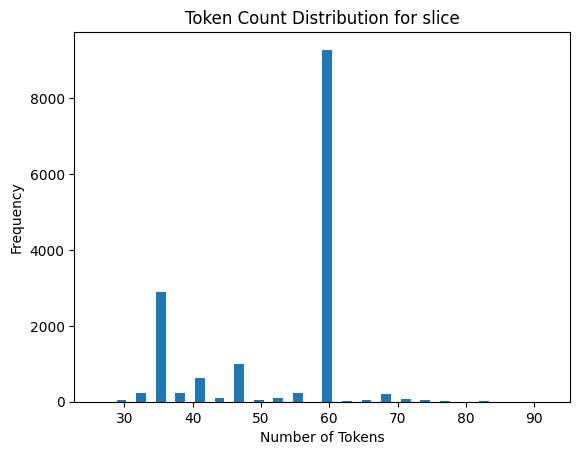

finished slice


100%|██████████| 15142/15142 [00:01<00:00, 8084.51it/s]


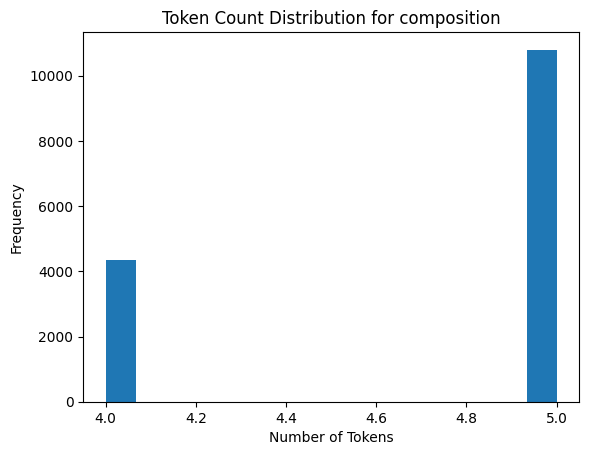

finished composition


100%|██████████| 15142/15142 [00:09<00:00, 1532.79it/s]


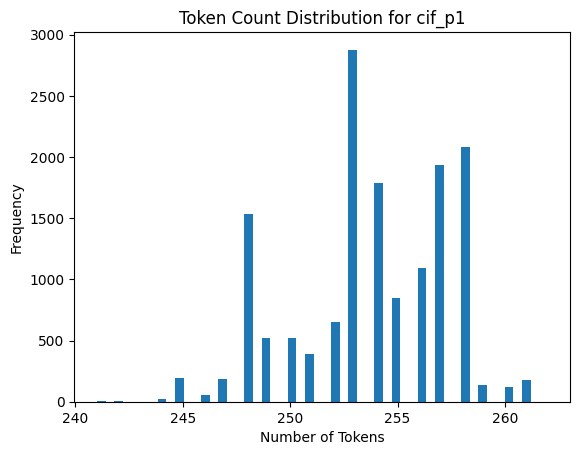

finished cif_p1


100%|██████████| 15142/15142 [00:12<00:00, 1178.25it/s]


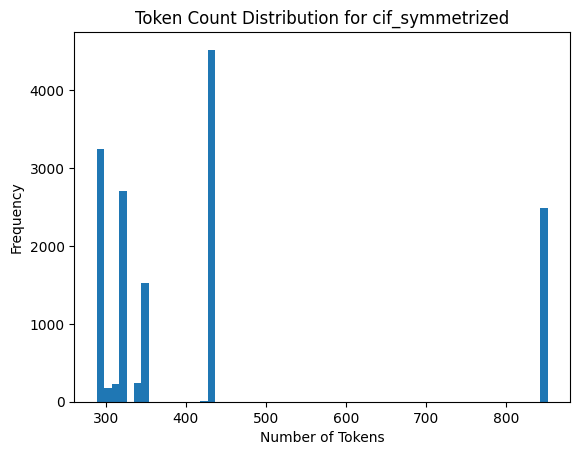

finished cif_symmetrized


100%|██████████| 15142/15142 [00:03<00:00, 4085.97it/s]


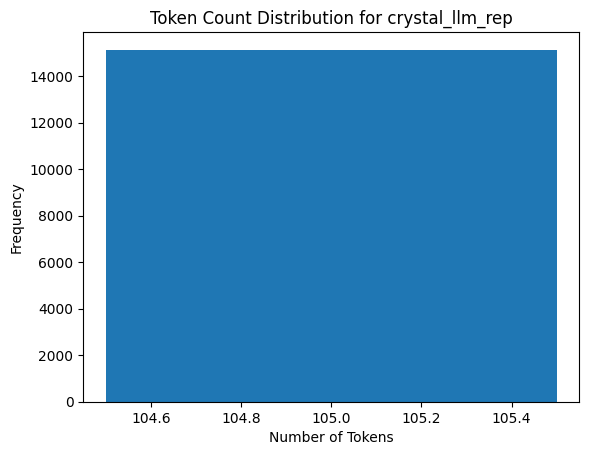

finished crystal_llm_rep


In [7]:
datasetname="perovskites"
dataset_path = f"/work/so87pot/material_db/matbench_text/train_matbench_{datasetname}_0.json"
representations = ["slice", "composition", "cif_p1", "cif_symmetrized", "crystal_llm_rep"]
context_length = 512
for rep in representations:
    count_tokens_and_plot(dataset_path, rep, context_length,datasetname)
    print("finished", rep)